In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from statsmodels.stats.multitest import multipletests
from magicbox.algorithm.plot import MidpointNormalize
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_RSM')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

In [2]:
def plot_sym_mat(fpath, items, figsize, mtc, out_file):
    data = pkl.load(open(fpath, 'rb'))
    assert data['row_name'] == data['col_name']
    if items == 'all':
        items = data['row_name']
    n_item = len(items)
    item_indices = [data['row_name'].index(i) for i in items]
    r_arr = data['r'][item_indices][:, item_indices]
    p_arr = data['p'][item_indices][:, item_indices]
    diag_mask = np.eye(n_item, dtype=bool)
    if mtc:
        tril_mask = np.tri(n_item, k=-1, dtype=bool)
        reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
            multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')

        triu_mask = tril_mask.T
        p_arr[triu_mask] = p_arr.T[triu_mask]
    p_mask = p_arr < 0.05

    # r_arr = np.ma.array(data['r'], mask=diag_mask)
    r_arr[diag_mask] = np.nan
    _, ax = plt.subplots(figsize=figsize)
    ticks = np.arange(n_item)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    # img = ax.imshow(r_arr, 'autumn')
    # plt.colorbar(img)
    ax.set_xticks(ticks)
    ax.set_xticklabels(items)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    ax.set_yticks(ticks)
    ax.set_yticklabels(items)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # plt.colorbar(img, shrink=0.5)

    grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
    ax.set_xticks(grid_ticks, minor=True)
    ax.set_yticks(grid_ticks, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
    ax.tick_params(which="minor", bottom=False, left=False)

    for i in range(n_item):
        for j in range(n_item):
            # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
            if np.isnan(r_arr[i, j]):
                continue

            if p_mask[i, j]:
                weight = 'bold'
            else:
                weight = None

            ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                    ha="center", va="center", color="k", weight=weight)

    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

RSM_MMP-vis2-early2-LR.pkl
RSM_MMP-vis2-early2-LR_R2.pkl
RSM_MMP-vis2-later2-LR.pkl
RSM_MMP-vis2-later2-LR_R2.pkl


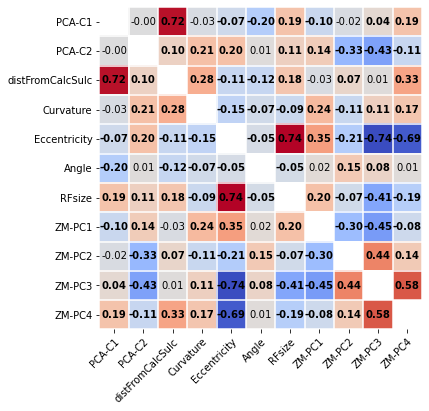

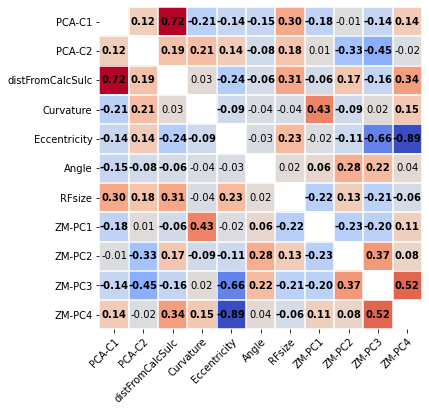

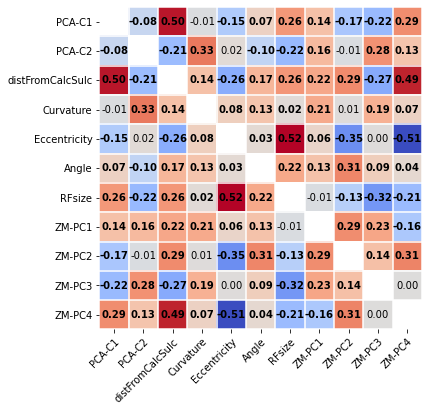

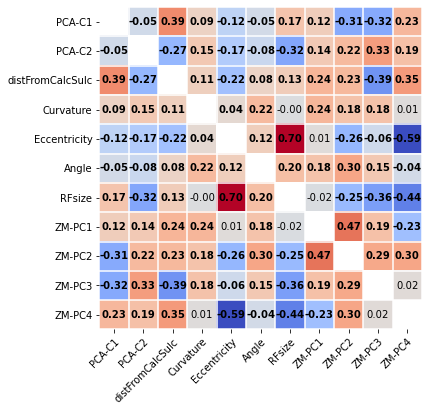

In [11]:
fnames = [
    # 'RSM_MMP-vis2-early-LR.pkl',
    # 'RSM_MMP-vis2-early-LR_R2.pkl',
    # 'RSM_MMP-vis2-later-LR.pkl',
    # 'RSM_MMP-vis2-later-LR_R2.pkl',
    'RSM_MMP-vis2-early2-LR.pkl',
    'RSM_MMP-vis2-early2-LR_R2.pkl',
    'RSM_MMP-vis2-later2-LR.pkl',
    'RSM_MMP-vis2-later2-LR_R2.pkl',
    # 'RSM_MMP-vis2-dorsal-LR.pkl',
    # 'RSM_MMP-vis2-dorsal-LR_R2.pkl',
    # 'RSM_MMP-vis2-ventral-LR.pkl',
    # 'RSM_MMP-vis2-ventral-LR_R2.pkl',
    # 'RSM_MMP-vis2-middle-LR.pkl',
    # 'RSM_MMP-vis2-middle-LR_R2.pkl',
    # 'RSM_MMP-vis2-L.pkl',
    # 'RSM_MMP-vis2-R.pkl',
    # 'RSM_MMP-vis2-LR.pkl',
    # 'RSM_MMP-vis2-L_R2.pkl',
    # 'RSM_MMP-vis2-R_R2.pkl',
    # 'RSM_MMP-vis2-LR_R2.pkl',
]

for fname in fnames:
    print(fname)
    plot_sym_mat(
        fpath=pjoin(anal_dir, f'RSM/{fname}'),
        items=('PCA-C1', 'PCA-C2', 'distFromCalcSulc', 'Curvature', 'Eccentricity',
        'Angle', 'RFsize', 'ZM-PC1', 'ZM-PC2', 'ZM-PC3', 'ZM-PC4'),
        # items='all',
        figsize=(6, 6), mtc=False,
        # out_file=None
        out_file=pjoin(work_dir, f"{fname.split('.')[0]}.jpg")
    )